# Local Averages

In [1]:
import numpy as np
import scipy as sp
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
import pdb

import sys
sys.path.append("../../")
import pyApproxTools as pat
importlib.reload(pat)

%matplotlib inline

## Local Averages

Now we are interested in local averages - where we integrate $v(x)$ against some compactly supported molifier function $\varphi_\varepsilon$, that is we find $\int \varphi_{\varepsilon}(x - x_0) v(x) \, \mathrm{d} x$. We find a Riesz representer $\omega_{x_0, \varepsilon}$ of this local integration, that is we define
$$
\langle \omega_{x_0, \varepsilon}, v \rangle = \int \varphi_{\varepsilon}(x - x_0) v(x) \, \mathrm{d} x 
$$

In the case where $\varphi_{\varepsilon} = \mathbb{1}_{[x_0 - \varepsilon/2, x_0 + \varepsilon/2]}$, and our space is $H_0^1([0,1])$, we have that
$$
\omega_{x_0, \varepsilon}(x) = \frac{1}{\sqrt{x_0-\varepsilon/6 + x_0^2}}
\begin{cases}
(1-x_0) x & \text{for } x \le x_0-\varepsilon/2 \\
(1-x_0) x - \frac{1}{2}\frac{(x-(x_0-\varepsilon/2))^2}{\epsilon} & \text{for } x_0 - \varepsilon/2 < x \le x_0+\varepsilon/2 \\
x_0 (1 - x)  & \text{for } x > x_0 + \varepsilon/2
\end{cases}
$$


### Projections

First we just want to see the performance of the projection on to a basis of uniformly spaced local averages for $m\to\infty$ with a variety of $\varepsilon$. We test this against a single function that is made up of sinusoids with random coefficients, i.e.
$$
v(x) = \sum_{k=1}^N \frac{y_k}{1+k^2}\sin(k \pi x)
$$
where $y_k\sim \mathcal{U}([-1,1])$ are IID uniformly distributed.

We then produce, for a variety of $\varepsilon$ (from about $1\times 10^{-2}$ to $1\times 10^{-4}$) a series of evenly spaced local averages as our basis, i.e. we take
$$
W_m = \mathrm{span}\{ \omega_{x_k, \varepsilon} : x_k = \varepsilon/2 + k / m \text{ for } k=0\ldots m-1 \}
$$
for $m$ ranging from 10 to something higher. Note that this allows the local averages to overlap.

We then plot $\| v - P_{W_m} v \|_{H_0^1}$ against $m$ for each choice of $\varepsilon$.

In [2]:
# Lets test with a function made of random sinusoids with decaying coefficients... (i.e. in some)
num_components = 200
np.random.seed(1)
v_c = 2 * np.random.random(num_components) - 1
for i in range(1,num_components+1):
    v_c[i-1] *= 1.0 / (1.0 + i*i)
v = pat.FuncVector(params=[range(1,101)], coeffs=[v_c], funcs=['H1UISin'])

Wm_plot = pat.make_unif_avg_basis(10, 0.05)
v_W, v_c = Wm_plot.project(v, return_coeffs=True)

#epsilons = [5e-2, 2.5e-2, 1e-2, 5e-3, 2.5e-3, 1e-3, 5e-4]
adj = 1 / (100*num_components + 1)
epsilons = [5e-2, 2.5e-2, 1e-2, 5e-3, 2.5e-3, 1e-3, 5e-4]
m_range = range(10,200)
err = np.zeros((len(epsilons), len(m_range)))

# Compute projection error for various epsilon and m
print('Converging uniform local averages for epsilon = ', end='')
for i, epsilon in enumerate(epsilons):
    print(str(epsilon) + '... ', end='')
    for j, m in enumerate(m_range):
        Wm = pat.make_unif_avg_basis(m, epsilon-adj)
        v_W = Wm.project(v)
        err[i,j] = (v - v_W).norm()

Converging uniform local averages for epsilon = 0.05... 0.025... 0.01... 0.005... 0.0025... 0.001... 0.0005... 

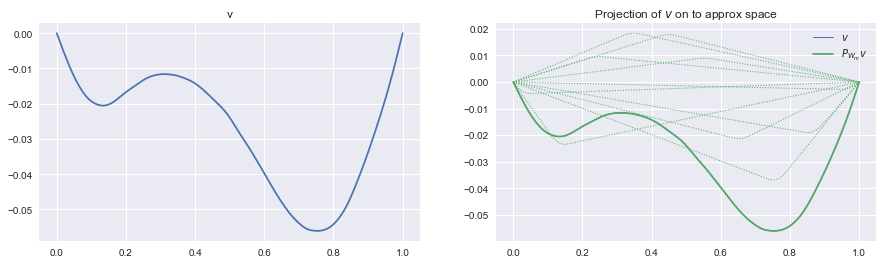

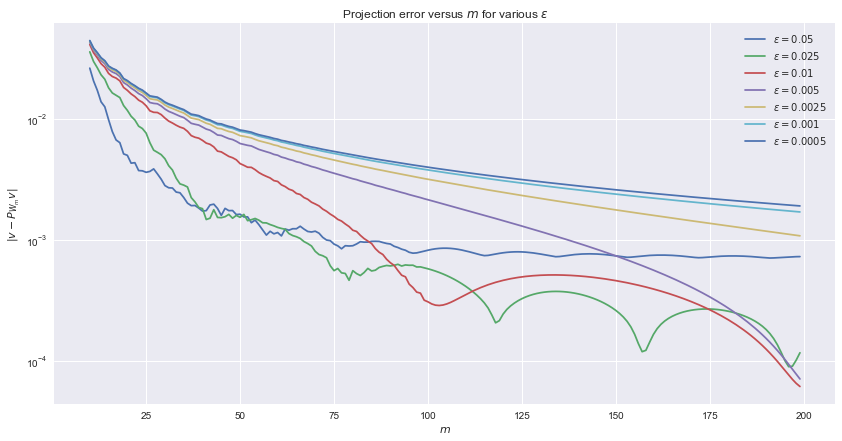

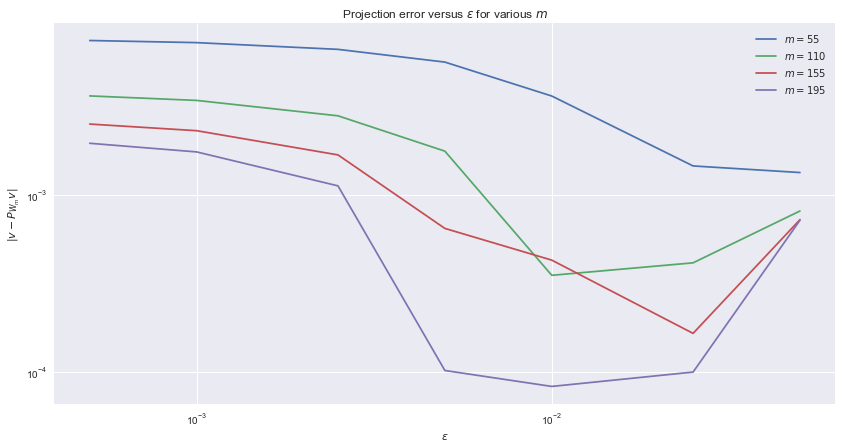

In [3]:
xs = np.arange(0.0, 1.005, 0.005)

sns.set_palette('deep')
cp = sns.color_palette()
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(1, 2, 1, title='v')
plt.plot(xs, v.evaluate(xs), label=r'$v$')
ax = fig.add_subplot(1, 2, 2, title='Projection of $v$ on to approx space')
plt.plot(xs, v.evaluate(xs), label=r'$v$', linewidth=1)
plt.plot(xs, v_W.evaluate(xs), label=r'$P_{W_m} v$')
for i in range(Wm_plot.n):
    plt.plot(xs, (Wm_plot.vecs[i].evaluate(xs))*v_c[i], ':', linewidth=1, color=cp[1])
plt.legend()
plt.show()

# Compute projection error for various epsilon and m
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 1, 1, title=r'Projection error versus $m$ for various $\varepsilon$')
for i, epsilon in enumerate(epsilons):
    plt.semilogy(m_range, err[i,:], label=r'$\varepsilon={{{0}}}$'.format(epsilon))
ax.set(xlabel=r'$m$', ylabel=r'$\|v - P_{W_m} v\|$')
plt.legend()
plt.show()

# Pick some m and plot against epsilon...
ms = [55, 110, 155, 195]
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 1, 1, title=r'Projection error versus $\varepsilon$ for various $m$')
for i, m_sel in enumerate(ms):
    plt.loglog(epsilons, err[:,m_range.index(m_sel)], label=r'$m={{{0}}}$'.format(m_sel))
ax.set(xlabel=r'$\varepsilon$', ylabel=r'$\|v - P_{W_m} v\|$')
plt.legend()
plt.show()

Note that there is a spike in error every time that $\varepsilon = 1/m$... This makes sense, but lets take a closer look at $m=20$ and $m=21$ when $\varepsilon=0.05, just to make sure something isn't going terribly wrong

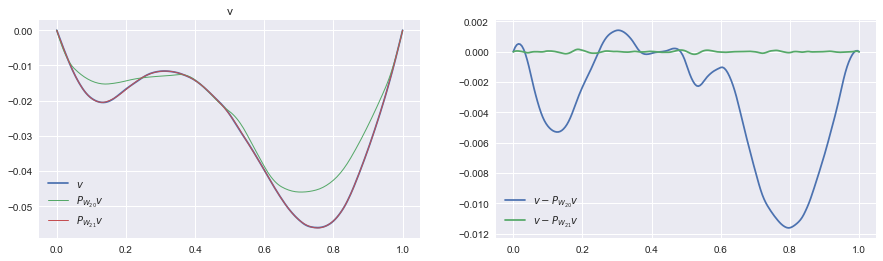

In [4]:
Wm = pat.make_unif_avg_basis(20, 0.05)
v_W, v_c = Wm.project(v, return_coeffs=True)
Wm2 = pat.make_unif_avg_basis(21, 0.05)
v_W2, v_c2 = Wm2.project(v, return_coeffs=True)

xs = np.arange(0.0, 1.005, 0.005)

sns.set_palette("deep",8)
cp = sns.color_palette()
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(1, 2, 1, title='v')
plt.plot(xs, v.evaluate(xs), label=r'$v$')
plt.plot(xs, v_W.evaluate(xs), label=r'$P_{W_{20}} v$', linewidth=1)
plt.plot(xs, v_W2.evaluate(xs), label=r'$P_{W_{21}} v$', linewidth=1)
plt.legend()
ax = fig.add_subplot(1, 2, 2, title='')
plt.plot(xs, (v-v_W).evaluate(xs), label=r'$v - P_{W_{20}} v$')
plt.plot(xs, (v-v_W2).evaluate(xs), label=r'$v - P_{W_{21}} v$')
plt.legend()
plt.show()

### Now we try the Collective OMP and Worst-Case OMP algorithms for this problem

We look at the results both with $\varepsilon=0.01$ and $0.0025$ for both algorithms

In [5]:
N = 1e3
eps_0 = 0.04 # Re run with this
eps_1 = 0.025
eps_2 = 0.01
eps_3 = 0.0025
dictionaries = [pat.make_unif_dictionary(N), pat.make_unif_avg_dictionary(N, eps_1),\
                pat.make_unif_avg_dictionary(N, eps_2), pat.make_unif_avg_dictionary(N, eps_3)]

ns = [20,40]
np.random.seed(3)
#n = 20
m = 150
bs_comp = np.zeros((len(ns), m, len(dictionaries)))
bs_wcomp = np.zeros((len(ns), m, len(dictionaries)))
bs_rand = np.zeros((len(ns), m))
bs_avg = np.zeros((len(ns), m))

Vn = pat.make_sin_basis(ns[-1])
Wms_comp = []
Wms_wcomp = []
Wms_avg = []
Wms_rand = []

for k, dictionary in enumerate(dictionaries):
    for j, n in enumerate(ns):

        #gbc = pat.CollectiveOMP(m, dictionary, Vn.subspace(slice(0,n)), verbose=True)
        #Wm_comp = gbc.construct_basis()
        #Wms_comp.append(Wm_comp)
        #Wm_comp_o = Wm_comp.orthonormalise()

        wcgbc = pat.WorstCaseOMP(m, dictionary, Vn.subspace(slice(0,n)), verbose=True)
        Wm_wcomp = wcgbc.construct_basis()
        Wms_wcomp.append(Wm_wcomp)
        Wm_wcomp_o = Wm_wcomp.orthonormalise()

        # For efficiency it makes sense to compute the basis pair and the associated
        # cross-gramian only once, then sub sample it as we grow m...
        #BP_comp_l = pat.BasisPair(Wm_comp_o, Vn.subspace(slice(0,n)))
        BP_wcomp_l = pat.BasisPair(Wm_wcomp_o, Vn.subspace(slice(0,n)))

        for i in range(n, m):
            #BP_comp = BP_comp_l.subspace(Wm_indices=slice(0,i))
            #bs_comp[j, i, k] = BP_comp.beta()

            BP_wcomp =  BP_wcomp_l.subspace(Wm_indices=slice(0,i))
            bs_wcomp[j, i, k] = BP_wcomp.beta()

for j, n in enumerate(ns):

    Wm_rand = pat.make_random_delta_basis(m)
    Wms_rand.append(Wm_rand)
    Wm_rand_o = Wm_rand.orthonormalise()

    # For efficiency it makes sense to compute the basis pair and the associated
    # cross-gramian only once, then sub sample it as we grow m...
    BP_rand_l = pat.BasisPair(Wm_rand_o, Vn.subspace(slice(0,n)))

    for i in range(n, m):
        BP_rand = BP_rand_l.subspace(Wm_indices=slice(0,i))
        bs_rand[j, i] = BP_rand.beta()



Generating basis from greedy algorithm with dictionary: 
i 	 || P_Vn (w - P_Wm w) ||
1 : 	 0.1535379542068806
2 : 	 0.23725663206188435
3 : 	 0.322581908262289
4 : 	 0.18747875804312494
5 : 	 0.3487198714881529
6 : 	 0.2420819326034826
7 : 	 0.24454226326855957
8 : 	 0.19039441583262504
9 : 	 0.2015426855513094
10 : 	 0.14632506003971366
11 : 	 0.17758165745102872
12 : 	 0.17542391100909485
13 : 	 0.16937913718318245
14 : 	 0.2770955984247522
15 : 	 0.2679966232564109
16 : 	 0.28051620132499955
17 : 	 0.23593280073125308
18 : 	 0.16580579661651082
19 : 	 0.1499893390367136
20 : 	 0.15291048834334436
21 : 	 0.11775307094605468
22 : 	 0.10337371083642456
23 : 	 0.14962743187876354
24 : 	 0.09911943879506263
25 : 	 0.07624200910706895
26 : 	 0.08354190035810406
27 : 	 0.07063614253497309
28 : 	 0.08076787503290431
29 : 	 0.08278455763345959
30 : 	 0.07091946101839439
31 : 	 0.06962401125088225
32 : 	 0.07583148222129166
33 : 	 0.08846703407402393
34 : 	 0.09812533346301668
35 : 	 0.0804

141 : 	 0.005921879059609142
142 : 	 0.006347642419947806
143 : 	 0.006543369645084167
144 : 	 0.009694525908594098
145 : 	 0.008399845557391025
146 : 	 0.006057611647189709
147 : 	 0.005781542749720772
148 : 	 0.005956149671665703
149 : 	 0.006466401399675609


Done!


Generating basis from greedy algorithm with dictionary: 
i 	 || P_Vn (w - P_Wm w) ||
1 : 	 0.15937284686876843
2 : 	 0.23498782753302644
3 : 	 0.31851926471229447
4 : 	 0.18274847767569657
5 : 	 0.34069904868521456
6 : 	 0.23934350361718884
7 : 	 0.2368256966235463
8 : 	 0.19635763419551192
9 : 	 0.19672237379949212
10 : 	 0.1391875979181464
11 : 	 0.1708266273858605
12 : 	 0.2378576223917536
13 : 	 0.220544760097541
14 : 	 0.22686799238229788
15 : 	 0.2652188446064412
16 : 	 0.30296415626137807
17 : 	 0.2488743690166412
18 : 	 0.13490737774944966
19 : 	 0.22324204923386815
20 : 	 0.11925016877719868
21 : 	 0.12157616598378132
22 : 	 0.08155193281127388
23 : 	 0.08676639466514555
24 : 	 0.053879479174875344
25 : 	 0.083

126 : 	 0.0022950814868003613
127 : 	 0.0021359519775438762
128 : 	 0.002148491483425094
129 : 	 0.0021364256567185935
130 : 	 0.002450501451940007
131 : 	 0.0024456926623068614
132 : 	 0.0021692337050095156
133 : 	 0.0020793805214464056
134 : 	 0.002037752744342071
135 : 	 0.0020038770438504097
136 : 	 0.001965720223138956
137 : 	 0.0019445098181970488
138 : 	 0.001923534140550992
139 : 	 0.001919580435745069
140 : 	 0.002072834446456062
141 : 	 0.0016704886247828343
142 : 	 0.00160820207357118
143 : 	 0.0015839037229146702
144 : 	 0.0015546325749239975
145 : 	 0.0014707155281098727
146 : 	 0.0013807209716813745
147 : 	 0.0013356392385562924
148 : 	 0.0012285598300710854
149 : 	 0.0011867969559085229


Done!


Generating basis from greedy algorithm with dictionary: 
i 	 || P_Vn (w - P_Wm w) ||
1 : 	 0.15857897986867822
2 : 	 0.24008635587193922
3 : 	 0.3251473607389026
4 : 	 0.18844715860676395
5 : 	 0.34848285082582403
6 : 	 0.24293785086247582
7 : 	 0.2437803387415052
8 : 	 0.196014

113 : 	 0.0018555043681796612
114 : 	 0.0015515054299139394
115 : 	 0.0025386225929185935
116 : 	 0.0013789306021726039
117 : 	 0.0014359645381728237
118 : 	 0.0016125278523971172
119 : 	 0.0013427242621955604
120 : 	 0.0013252429216191602
121 : 	 0.0015046243459782248
122 : 	 0.0019967386418456162
123 : 	 0.0016692219331929724
124 : 	 0.0015271223662800563
125 : 	 0.0009912391390515043
126 : 	 0.0008782006970270637
127 : 	 0.001312812306639205
128 : 	 0.001013405595110603
129 : 	 0.0009346344137733525
130 : 	 0.002142787745268191
131 : 	 0.001238680940096576
132 : 	 0.0008120218818204923
133 : 	 0.0007051027878717461
134 : 	 0.0008879979038818597
135 : 	 0.0008533413315406106
136 : 	 0.0005717156522930048
137 : 	 0.0007547768157926185
138 : 	 0.0005606779965044162
139 : 	 0.0006058275561866754
140 : 	 0.0005634453778012231
141 : 	 0.0005617267219523749
142 : 	 0.000495502216165844
143 : 	 0.0006102432697768501
144 : 	 0.00042441065713351434
145 : 	 0.0004343531853340313
146 : 	 0.0003

102 : 	 0.011356375381409906
103 : 	 0.010177087585088715
104 : 	 0.009569777171907786
105 : 	 0.017979431337639615
106 : 	 0.013622486208269308
107 : 	 0.010341335887998682
108 : 	 0.008366027042734363
109 : 	 0.00694323109957741
110 : 	 0.009187167116586861
111 : 	 0.008396368738491596
112 : 	 0.011602076493335695
113 : 	 0.006664746347982392
114 : 	 0.008960969101366095
115 : 	 0.007717436551755885
116 : 	 0.009910268976018623
117 : 	 0.020106497954973906
118 : 	 0.01372544244458887
119 : 	 0.009240249998510072
120 : 	 0.007340362941998586
121 : 	 0.0067821812195109354
122 : 	 0.008566737289932742
123 : 	 0.008567764757991335
124 : 	 0.011072054997120237
125 : 	 0.005628000372921611
126 : 	 0.007588857665665805
127 : 	 0.01382081571867147
128 : 	 0.006663034201981548
129 : 	 0.005800619249478202
130 : 	 0.00584977614366651
131 : 	 0.011818303162771215
132 : 	 0.00490150944037554
133 : 	 0.006105913363919829
134 : 	 0.00664771246900453
135 : 	 0.005862297758431376
136 : 	 0.006750663

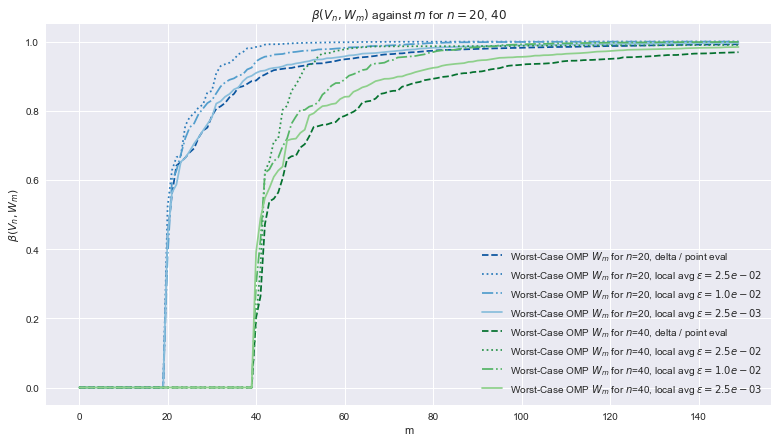

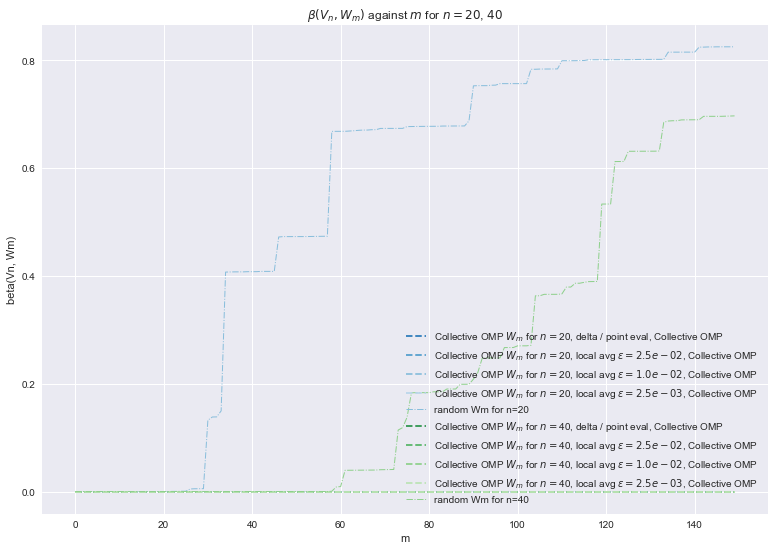

In [6]:
dict_label = [r'delta / point eval', r'local avg $\varepsilon={{{0:0.1e}}}$'.format(eps_1), r'local avg $\varepsilon={{{0:0.1e}}}$'.format(eps_2), r'local avg $\varepsilon={{{0:0.1e}}}$'.format(eps_3)]
line_style = ['--', ':', '-.', '-']
pals = [ 'Blues_r', 'Greens_r', 'Reds_r']
axs = []
fig = plt.figure(figsize=(13, 7))
ax = fig.add_subplot(1, 1, 1, title=r'$\beta(V_n, W_m)$ against $m$ for $n=20$, $40$')#, title=r'$\beta(V_n, W_m)$ against $m$ for various $n$')
for i, n in enumerate(ns):
    sns.set_palette(pals[i])
    cp = sns.color_palette()
    for k, dictionary in enumerate(dictionaries):
        plt.plot(range(m), bs_wcomp[i, :, k], line_style[k], label=r'Worst-Case OMP $W_m$ for $n$={0}, {1}'.format(n, dict_label[k]), color=cp[k])

ax.set(xlabel='m', ylabel=r'$\beta(V_n, W_m)$')#r'$m$', ylabel=r'$\beta(V_n, W_m)$')
plt.legend(loc=4)
plt.savefig('WCOMPAvgVsDelta.pdf')
plt.show()

fig = plt.figure(figsize=(13, 9))
ax = fig.add_subplot(1, 1, 1, title=r'$\beta(V_n, W_m)$ against $m$ for $n=20$, $40$')#, title=r'$\beta(V_n, W_m)$ against $m$ for various $n$')
for i, n in enumerate(ns):
    sns.set_palette(pals[i])
    cp = sns.color_palette() 
    for k, dictionary in enumerate(dictionaries):
        plt.plot(range(m), bs_comp[i, :, k], '--', label=r'Collective OMP $W_m$ for $n=${0}, {1}, Collective OMP'.format(n, dict_label[k]), color=cp[k+1])
    plt.plot(range(m), bs_rand[i, :], '-.', label=r'random Wm for n={0}'.format(n), color=cp[k], lw=1)

ax.set(xlabel='m', ylabel='beta(Vn, Wm)')#r'$m$', ylabel=r'$\beta(V_n, W_m)$')
plt.legend(loc=4)
plt.show()